<center>
<a href="" ><img src="./logo.png" style="float:left; max-width: 200px; height: 145px; "/></a> 
</center>
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(17, 16, 16); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color:rgb(247, 239, 248); margin-bottom: 10px;">
    Détection de Fraude par une Méthode à Deux Niveaux 
  </h1>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(227, 231, 235); margin: 5px 0;">
    Élaboré par :  
  </p>
  <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 5px; justify-items: center; margin-bottom: 10px;">
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(225, 233, 241); font-weight: bold;">
      &#9733; ZIAN Hafsa
    </p>
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(225, 233, 241); font-weight: bold;">
      &#9733; HAYHAY Yasmine
    </p>
  </div>
  <div style="margin-top: 15px; padding: 5px; background-color: #ecf0f1; border-left: 4px solid rgb(127, 50, 129); border-radius: 8px; display: inline-block; max-width: 60%;">
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color:rgb(16, 17, 17); margin: 0; font-style: italic;">
      Supervisé par : 
      <span style="font-weight: bold; color:rgb(129, 27, 116);">Pr. ELHARCHILI Fidae</span>
    </p>
  </div>
</div> 

## Setup du projet

In [68]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, homogeneity_score, completeness_score, v_measure_score
from tabulate import tabulate


## Préparation des données

In [70]:
# Chargement des données
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
# Normalisation de la variable 'Amount'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [88]:
# Séparation des données
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Niveau supérieur : Régression logistique


In [89]:
#Crée un modèle de régression logistique avec une optimisation est basé sur la maximisation de la vraisemblance
log_reg = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42)

#Apprend les paramètres w du modèle en maximisant la log-vraisemblance en utilisant la descente de gradient pour trouver les meilleurs poids w
log_reg.fit(X_train, y_train)

#- Calcule z et le passe  dans la fonction sigmoïde afin d'appliquer un seuil de décision pour le classer
y_pred_log_reg = log_reg.predict(X_test)

## Rapport de classification du niveau supérieur

In [90]:
from tabulate import tabulate
report_dict = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(3)

print("\n Rapport de classification du niveau supérieur :\n")
print(tabulate(report_df, headers='keys', tablefmt='fancy_grid'))



 Rapport de classification du niveau supérieur :

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │       0.999 │    1     │      1     │ 85295     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │       0.74  │    0.655 │      0.695 │   148     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │       0.999 │    0.999 │      0.999 │     0.999 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │       0.87  │    0.828 │      0.847 │ 85443     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │       0.999 │    0.999 │      0.999 │ 85443     │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


### Matrice de confusion
La matrice de confusion donne une vue détaillée des performances du modèle en montrant combien d'exemples ont été correctement ou incorrectement classés dans chaque classe

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
labels = ["Classe 0", "Classe 1"]
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print("\nMatrice de confusion du niveau supérieur :\n")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="fancy_grid"))



Matrice de confusion du niveau supérieur :

╒══════════╤════════════╤════════════╕
│          │   Classe 0 │   Classe 1 │
╞══════════╪════════════╪════════════╡
│ Classe 0 │      85261 │         34 │
├──────────┼────────────┼────────────┤
│ Classe 1 │         51 │         97 │
╘══════════╧════════════╧════════════╛


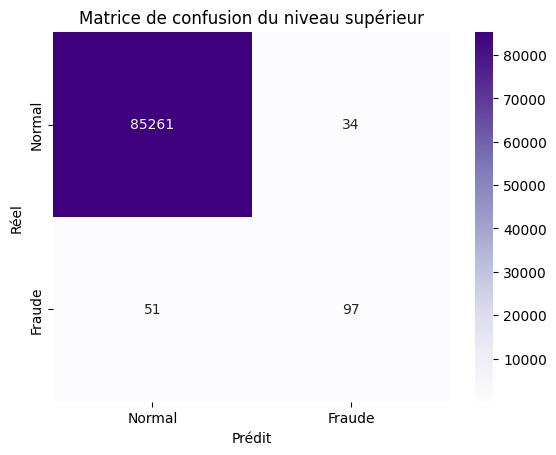

In [92]:
# Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion du niveau supérieur')
plt.show()

### La courbe ROC

AUC-ROC : 0.9147197405506804


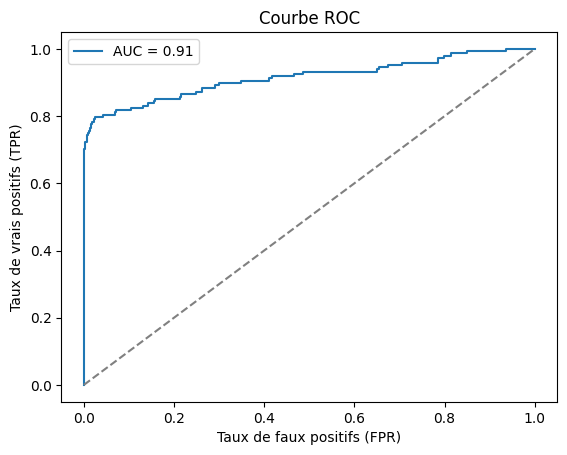

In [93]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC :", auc_roc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## Niveau inférieur : K-means

In [94]:
#Utilise la sortie du modèle de régression logistique pour identifier les transactions qui ont été classées comme suspectes, c'est-à-dire celles où y_pred_log_reg == 1.
suspect_indices = np.where(y_pred_log_reg == 1)[0] 
X_suspect = X_test.iloc[suspect_indices]  


In [95]:
#l'algorithme K-means est appliqué sur les transactions suspectes (X_suspect)
#Le modèle essaie de diviser les transactions en 2 clusters fraudes potentielles et non-fraudes).
kmeans = KMeans(n_clusters=2, random_state=42)
#Le fit_predict permet à l'algorithme de trouver les deux clusters et d'assigner chaque transaction suspecte à l'un des clusters
#Le tableau clusters contient les labels de chaque transaction (0 ou 1 selon le cluster auquel elle appartient)
clusters = kmeans.fit_predict(X_suspect)

In [98]:
# Identification du cluster de fraudes
fraud_cluster = 1 if np.sum(y_test.iloc[suspect_indices][clusters == 1]) > np.sum(y_test.iloc[suspect_indices][clusters == 0]) else 0
fraud_indices = suspect_indices[clusters == fraud_cluster]

In [105]:
# Résultats du niveau inférieur
print("\nNombre de transactions suspectes détectées au niveau inférieur :", len(fraud_indices))


Nombre de transactions suspectes détectées au niveau inférieur : 95


In [106]:
homogeneity = homogeneity_score(y_test.iloc[suspect_indices], clusters)
completeness = completeness_score(y_test.iloc[suspect_indices], clusters)
v_measure = v_measure_score(y_test.iloc[suspect_indices], clusters)

print(f"Homogeneity Score: {homogeneity:.3f}")
print(f"Completeness Score: {completeness:.3f}")
print(f"V-Measure Score: {v_measure:.3f}")


Homogeneity Score: 0.174
Completeness Score: 0.169
V-Measure Score: 0.172



Matrice de confusion :

╒══════════╤═════════════╤═════════════╕
│          │   Cluster 0 │   Cluster 1 │
╞══════════╪═════════════╪═════════════╡
│ Classe 0 │           0 │          34 │
├──────────┼─────────────┼─────────────┤
│ Classe 1 │          36 │          61 │
╘══════════╧═════════════╧═════════════╛


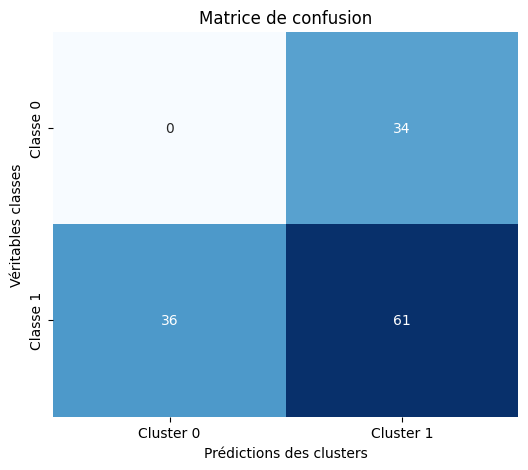

In [107]:
conf_matrix = confusion_matrix(y_test.iloc[suspect_indices], clusters)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Cluster 0', 'Cluster 1'], index=['Classe 0', 'Classe 1'])
print("\nMatrice de confusion :\n")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="fancy_grid"))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Classe 0', 'Classe 1'], cbar=False)
plt.xlabel('Prédictions des clusters')
plt.ylabel('Véritables classes')
plt.title('Matrice de confusion')
plt.show()

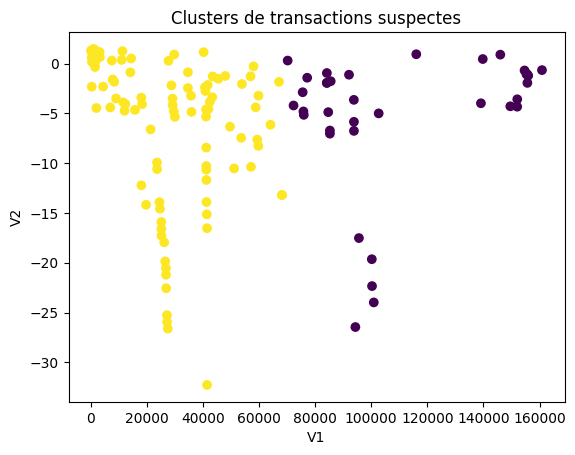

In [108]:
# Visualisation des clusters
plt.scatter(X_suspect.iloc[:, 0], X_suspect.iloc[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clusters de transactions suspectes')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [109]:
# Analyse des clusters
X_suspect = X_test.iloc[suspect_indices].copy()
X_suspect.loc[:, 'Cluster'] = clusters
cluster_summary = X_suspect.groupby('Cluster').mean()
print("\nRésumé des clusters :\n")
print(tabulate(cluster_summary, headers='keys', tablefmt='fancy_grid'))



Résumé des clusters :

╒═══════════╤══════════╤══════════╤═════════╤══════════╤═════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤══════════╤═════════╤══════════╤════════════╤══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤═════════╤═══════════╤═══════════╤═══════════╤════════════╤════════════╤════════════╤═══════════╤══════════╤════════════╕
│   Cluster │     Time │       V1 │      V2 │       V3 │      V4 │       V5 │       V6 │       V7 │        V8 │       V9 │      V10 │     V11 │      V12 │        V13 │      V14 │       V15 │      V16 │      V17 │      V18 │      V19 │     V20 │       V21 │       V22 │       V23 │        V24 │        V25 │        V26 │       V27 │      V28 │     Amount │
╞═══════════╪══════════╪══════════╪═════════╪══════════╪═════════╪══════════╪══════════╪══════════╪═══════════╪══════════╪══════════╪═════════╪══════════╪════════════╪══════════╪═══════════╪══════════╪══════════╪══════════╪══════════╪═════════╪═══════════╪════════